# Performance Comparison between custom KMeans and Scikit-learn KMeans

# Scikit-learn KMeans

In [71]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [72]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In [73]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

In [74]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [75]:
kmeans.cluster_centers_

array([[-1.49970942,  2.90574194],
       [ 1.9877063 ,  0.83188579],
       [-1.20405793,  7.83785843],
       [ 0.90043932,  4.32217464]])

In [49]:
kmeans.labels_

array([0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 3, 2, 0, 2, 1, 3, 3, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 3, 1, 1, 1, 1, 3, 0, 3, 2, 0, 0, 2, 2, 3, 3, 2, 2, 1,
       2, 0, 0, 3, 0, 2, 3, 0, 3, 3, 3, 1, 2, 0, 3, 2, 1, 2, 1, 1, 0, 3,
       2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 3, 3, 3, 1, 1, 1, 2, 2, 0, 3, 1,
       3, 1, 0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 3, 3, 1,
       2, 3, 3, 2, 3, 3, 0, 0, 1, 1, 3, 2, 1, 0, 1, 0, 0, 1, 2, 0, 3, 0,
       1, 2, 3, 0, 0, 1, 3, 3, 1, 3, 2, 2, 1, 2, 1, 0, 1, 2, 3, 1, 3, 2,
       3, 0, 0, 2, 3, 1, 0, 3, 3, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       3, 2, 3, 3, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 3, 3, 0, 1, 1,
       1, 3, 2, 2, 2, 0, 3, 3, 1, 1, 2, 0, 2, 0, 1, 0, 3, 3, 3, 0, 2, 2,
       3, 0, 2, 0, 0, 1, 3, 2, 2, 3, 0, 0, 0, 0, 3, 1, 0, 2, 2, 0, 3, 0,
       0, 3, 3, 2, 2, 3, 2, 1, 1, 1, 0, 2, 1, 3, 0, 3, 0, 0, 0, 1, 3, 1,
       1, 0, 0, 3, 1, 3, 3, 3, 1, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 0, 3, 3,
       2, 0, 0, 2, 2, 1, 2, 2, 0, 3, 2, 0, 1, 3, 3,

In [50]:
from sklearn.metrics import homogeneity_score

homogeneity = homogeneity_score(cluster_assignments, kmeans.labels_)
homogeneity 

0.9936442712074952

<Axes: xlabel='Feature1', ylabel='Feature2'>

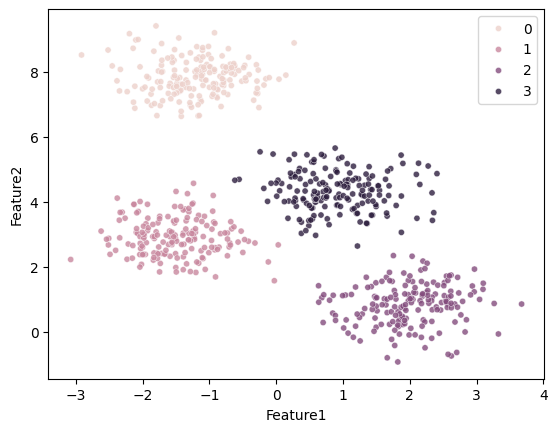

In [51]:
import seaborn as sns

sns.scatterplot(data=df, x=df.Feature1, y=df.Feature2, hue=kmeans.labels_, s=20, alpha=0.8)

# Custom KMeans

In [52]:
from KMeans import KMeans1

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In [53]:
kmeans = KMeans1(k=4)

In [54]:
clusters, centroids = kmeans.fit(X)

In [55]:
centroids

[[-1.4997094181421273, 2.905741940858995],
 [1.9877063026473274, 0.8318857877497887],
 [-1.2040579337244177, 7.837858432492295],
 [0.9004393234899268, 4.32217463716]]

In [40]:
clusters

array([2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 0, 1, 1, 2, 3, 2, 3, 3,
       0, 3, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 3, 2, 2, 3, 3, 1, 1, 3, 3, 0,
       3, 2, 2, 1, 2, 3, 1, 2, 1, 1, 1, 0, 3, 2, 1, 3, 0, 3, 0, 0, 2, 1,
       3, 0, 3, 3, 2, 3, 2, 2, 3, 0, 0, 1, 1, 1, 0, 0, 0, 3, 3, 2, 1, 0,
       1, 0, 2, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 3, 0, 0, 3, 3, 3, 1, 1, 0,
       3, 1, 1, 3, 1, 1, 2, 2, 0, 0, 1, 3, 0, 2, 0, 2, 2, 0, 3, 2, 1, 2,
       0, 3, 1, 2, 2, 0, 1, 1, 0, 1, 3, 3, 0, 3, 0, 2, 0, 3, 1, 0, 1, 3,
       1, 2, 2, 3, 1, 0, 2, 1, 1, 0, 2, 2, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3,
       1, 3, 1, 1, 3, 2, 0, 2, 3, 0, 0, 0, 0, 3, 0, 2, 3, 1, 1, 2, 0, 0,
       0, 1, 3, 3, 3, 2, 1, 1, 0, 0, 3, 2, 3, 2, 0, 2, 1, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 0, 1, 3, 3, 1, 2, 2, 2, 2, 1, 0, 2, 3, 3, 2, 1, 2,
       2, 1, 1, 3, 3, 1, 3, 0, 0, 0, 2, 3, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 0, 1, 1, 1, 0, 3, 1, 0, 1, 2, 1, 3, 3, 3, 1, 2, 1, 1,
       3, 2, 2, 3, 3, 0, 3, 3, 2, 1, 3, 2, 0, 1, 1,

In [76]:
homogeneity = homogeneity_score(cluster_assignments, clusters)
homogeneity 

0.9936442712074952

<Axes: xlabel='Feature1', ylabel='Feature2'>

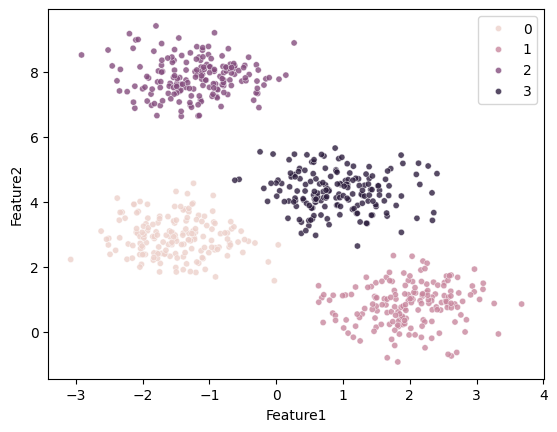

In [77]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
sns.scatterplot(data=df, x=df.Feature1, y=df.Feature2, hue=clusters, s=20, alpha=0.8)

# 3. Report two comparisons

* summary: I think both the custom KMeans and scikit-learn's KMeans have identified very similar centroids for the clusters,
  which represent the center of mass for each cluster, The centroids are identical to the floating-point, suggests both
  implementations are converging to the same solution and have performed similarly well in terms of identifying the cluster
  centers within the data.
* Comparison 1: Custom Implementation vs. Expected Values in cluster_assignments
    * The homogeneity score is 0.9936442712074952 for my KMeans implementation, which is very close to 1. This indicates
      that the clusters predicted by my KMeans implementation match almost with the true cluster expectation. so I think i
      can summarize the implemented KMeans version is effective and accurate in its clustering predictions.
* Comparison 2: Custom Implementation vs. scikit-learn’s Implementation
    * from the scatter graph of cluster distribution, both plots show a very similiar distribution of data points across the
      clusters, which reinforce the conclusion that the customer KMeans and scikit-learn’s KMeans perform equally well
      on this dataset. Besides from the clusters centrioids we can tell both are very similiar as well. Additional, both the
      homogeneity score the custom and scikit-learn KMeans is 0.9936442712074952,it implies that the homogeneity
      score between the custom implementation's clusters and scikit-learn’s labels would also be very high, potentially
      identical, assuming no variations have occurred in the dataset or clustering initialization, means we can conclude
      The custom KMeans implementation is as accurate as the scikit-learn’s implementation potentially.

# Choose and run clustering algorithms
    * KMeans
    * Hierarchical

* Chicago Taxi Data

In [84]:
df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


* first we do EDA, to do data quality report, look for any missing out

In [85]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [133]:
# First, drop columns only leave 'Pickup Centroid Latitude' and 'Pickup Centroid Longitude'
pickup_dropoff_columns = ['Pickup Centroid Latitude', 'Pickup Centroid Longitude']
pickup__dropoff_df = df[pickup_dropoff_columns]

pickup__dropoff_df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308
101786,41.980264,-87.913625


In [134]:
# clean pick up data and remove all the missing value
df_clean = pickup__dropoff_df.dropna().reset_index(drop=True)
df_clean

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
95652,41.878866,-87.625192
95653,41.885281,-87.657233
95654,41.899602,-87.633308
95655,41.899602,-87.633308


In [135]:
df_clean.corr(numeric_only=True)

,Pickup Centroid Latitude,Pickup Centroid Longitude
Pickup Centroid Latitude,1.000000,-0.587282
Pickup Centroid Longitude,-0.587282,1.000000


* from the correlation between Pickup Centroid Latitude and Dropoff Centroid Latitude, we can see a strong negative correlation as value of one variable increases, the value of the other variable decreases in a directly proportional manner.

# data quality evaluation report

* 2 columns / features: Pickup Centroid Latitude, Pickup Centroid Longitude
* strong positive correlation between Pickup Centroid Latitude and Dropoff Centroid Latitude
* there's some missing data on There are missing values in Pickup Census Tract, Dropoff Census Tract, 
        Pickup Community Area, Dropoff Community Area, and the location-related fields

# Find & Plot KMeans Cluster 

In [157]:
from sklearn.preprocessing import StandardScaler
# data is being normalized
ss = StandardScaler()
ss.fit(df_clean.iloc[:])
norm_data = ss.transform(df_clean.iloc[:])
norm_data

array([[ 1.26216408, -2.14503019],
       [-0.30698521,  0.62109854],
       [ 0.01391335,  0.54326538],
       ...,
       [ 0.01391335,  0.54326538],
       [ 0.01391335,  0.54326538],
       [ 1.26216408, -2.14503019]])

In [158]:
# fit the normalized data into KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300)
kmeans.fit(norm_data)

KMeans(n_clusters=4, n_init=10)

In [159]:
kmeans.cluster_centers_

array([[-0.18862972,  0.51512109],
       [ 1.25384091, -2.07558458],
       [-2.00371726,  0.3569758 ],
       [ 1.02751873,  0.11316592]])

In [160]:
ss.inverse_transform(kmeans.cluster_centers_)

array([[ 41.88651374, -87.63624273],
       [ 41.97972647, -87.9063833 ],
       [ 41.76922243, -87.652733  ],
       [ 41.96510149, -87.67815578]])

<Axes: xlabel='Pickup Centroid Latitude', ylabel='Pickup Centroid Longitude'>

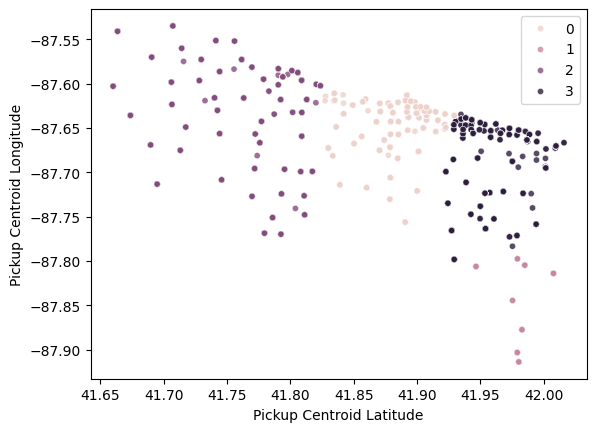

In [161]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df_clean, x=df_clean['Pickup Centroid Latitude'], y=df_clean['Pickup Centroid Longitude'], hue=kmeans.labels_, s=20, alpha=0.8)


* this graph is mainly finding the cluster grouping for taxi pickup location in Chicago, using KMeans 
its a little bit hard to tell the cluster relationship since Kmeans is better for spherical cluster, 
and maybe i will use Hierarchical to demonstrate the grouping.

# Hierarchical Clustering

In [164]:
columns = ['Trip ID', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude']
df_hier = df[columns]
df_hier

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,41.980264,-87.913625
1,11eeb6710caa0606028c7ba025bfa18c277886e8,41.878866,-87.625192
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,41.899602,-87.633308
3,2503e3944e5c82b89638447ad361638111129375,41.979071,-87.903040
4,23ddcfba2ad714fe0303909961ea74873be50da2,41.980264,-87.913625
...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,41.885281,-87.657233
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,41.899602,-87.633308
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,41.899602,-87.633308
101786,7f24c5101df65952ef318f558b8b071989ff7c17,41.980264,-87.913625


In [165]:
df_clean_hier = df_hier.dropna().reset_index(drop=True)
df_clean_hier

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,41.980264,-87.913625
1,11eeb6710caa0606028c7ba025bfa18c277886e8,41.878866,-87.625192
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,41.899602,-87.633308
3,2503e3944e5c82b89638447ad361638111129375,41.979071,-87.903040
4,23ddcfba2ad714fe0303909961ea74873be50da2,41.980264,-87.913625
...,...,...,...
95652,92882d146604aa4485de604e48f93b2ffd270027,41.878866,-87.625192
95653,9209df4c3541198fda3173a226f2df619a806022,41.885281,-87.657233
95654,f0957a8f6bef37bb2872649fb3c76ad1a179acab,41.899602,-87.633308
95655,4cb74df671cfccceb9b592f347ef1a94c1540c7a,41.899602,-87.633308


In [168]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [169]:
def leaf_label_function(index):
    return df_clean_hier.iloc[index, 0]

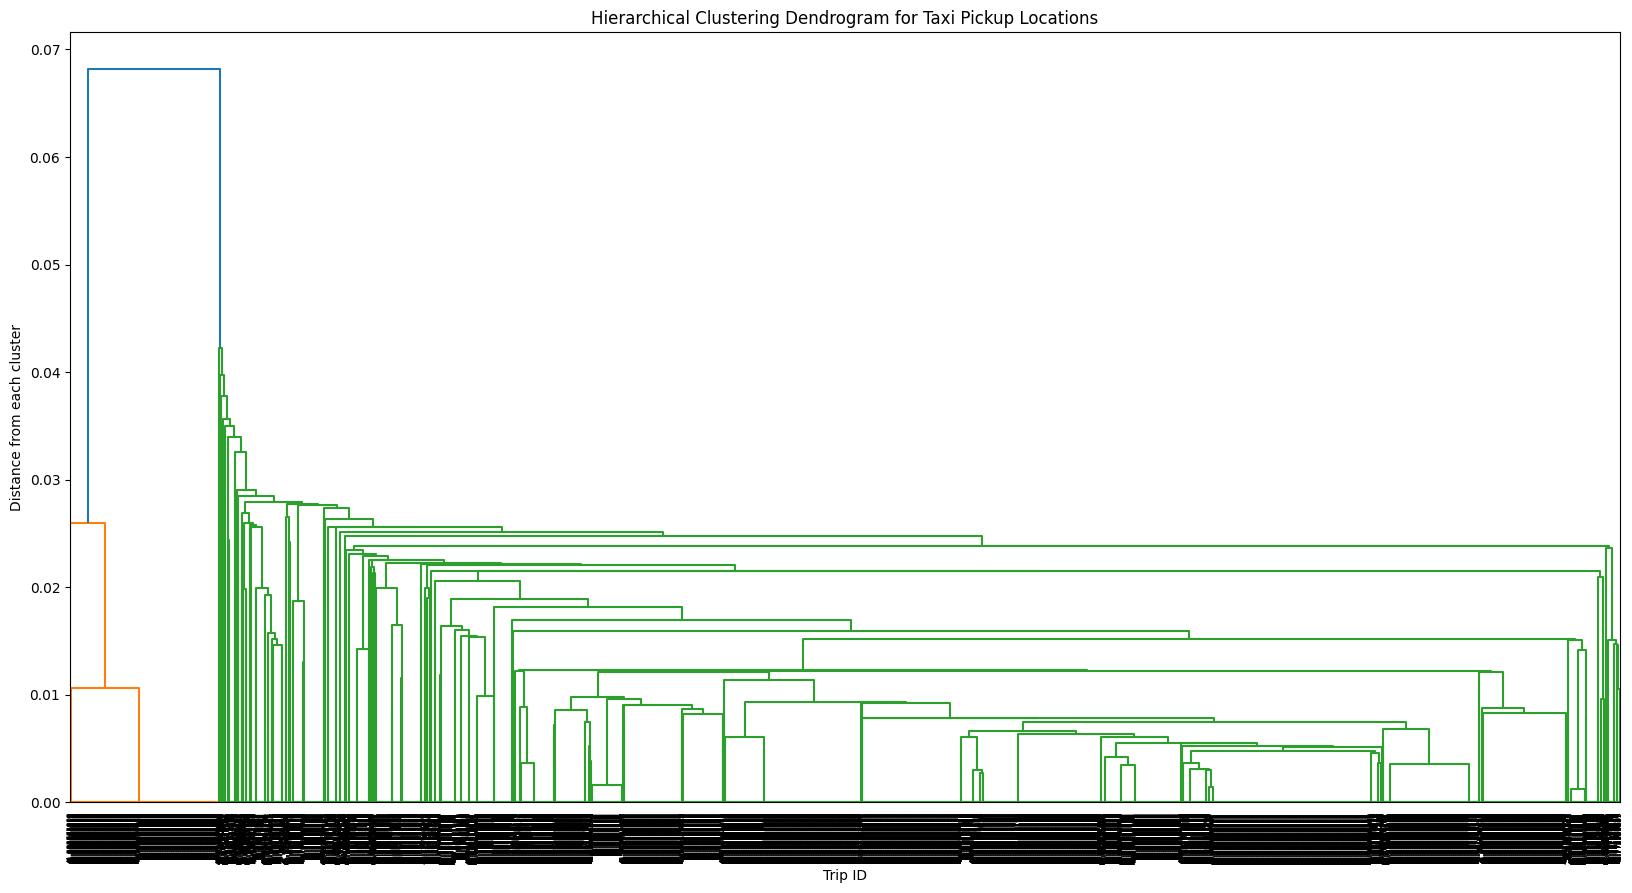

In [189]:
plt.figure(figsize=(20,10))
dend = dendrogram(linkage(df_clean_hier.iloc[:10000, -2:]), leaf_label_func=leaf_label_function)

plt.title('Hierarchical Clustering Dendrogram for Taxi Pickup Locations')
plt.xlabel('Trip ID')
plt.ylabel('Distance from each cluster')
plt.show()

# 1. The Reason for Choosing Hierarchical Clustering

* I think for the selected data, it is not visually feasible observe through KMeans since the cluster is not 
a circle shape. Also since we are measuring the variance between each pick up location, its better to use a
Agglomerative algorithms to group cluster into a dendrogram graph. And it is easier for pinpoint location to calculate the proximity between earch pair of cluster using complete linkage or average linkage.
* Also Hierarchical clustering provides a dendrogram,  a tree-like diagram that visually represents the arrangement and relative distances of clusters, this is better to observer for a non-circle cluster and very
useful in understanding the spatial distribution and grouping of taxi pickup locations
*  Unlike KMeans, hierarchical clustering doesn't require the number of clusters to be specified in advance
since it is geospatial data

# 2. Pre-processing of the Data or Any Hyperparameter Settings

* first I did data normalization before conduction cluster to makes sure all the features is on the same scale
because hierarchical clustering are sensitive to the scale of the data since these algorithms are using distance
measures to determine the similarity between data points
* Next I did a feature selection, only the geographical coordinates of pickup locations were  used for clustering, focusing the analysis on spatial patterns. also I selected only first 10000 instance since the original data is huge.
* Hyperparameter Settings: I am thinking to choose 'average' method for linkage criteria in hierarchical clustering to minimize the variance within each cluster, which is suitable for geographical data.

 # 3. Output from the Algorithm(s)

* The primary output is a dendrogram that illustrates how individual taxi trips are grouped 
into clusters based on their pickup locations since we are using distance measures to determine the similarity between data points, from the dendrogram, we can see each location with similiar latitude and longitude will be group into one cluster, then neighbor cluster will form to a larger cluster. and this dendrogram shows the hierarchical nature of these groupings and the relative distances between clusters

# 4. Metrics Used to Evaluate the Output and Performance

In [195]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

cluster_labels = fcluster(linkage(df_clean_hier.iloc[:100, -2:]), 4, criterion='maxclust')
silhouette_avg = silhouette_score(df_clean_hier.iloc[:100, -2:], cluster_labels)

silhouette_avg

0.8123929896286185

* I used Silhouette Score to evaluate the quality of the formed clusters by measuring how similar their pickup location as to its own cluster compared to other clusters. 
so In the context of taxi pickup locations, a Silhouette Score of 0.812 is considered very good, suggesting that the hierarchical clustering has successfully identified meaningful
and distinct geographic groupings, This high score indicates that, on average, taxi pickups within the same cluster are located near each other, while being far from pickups in other clusters. 
* What kind of performance did you get from that algorithm? I think the overall performance of hierarchical clustering is assessed by how accurately the generated clusters
represent meaningful groupings of taxi pickup locations. in this context with a high Silhouette Score 0.812, i think it indeed identified a meaningful cluster in dendrogram analysis and  
confirms that the clustering effectively captures the spatial patterns in taxi pickup data, and this indicates taxi pickups within the same cluster are located near each other, 
while being far from pickups in other clusters.
* Is that what you expected? I think with a high Silhouette Score and a clear dendrogram, the expectations from hierarchical clustering of taxi pickup data are met. Indeed it also indicates this algorithm's effectiveness in revealing the spatial of taxi pickup locations, guiding operational and strategic decisions in urban mobility services.